TP1 : Tatiana Arenas Suárez

### Parte 1 (imágenes en /white_patch y /coord_cromaticas):
- 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
- 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
- 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.


In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np # type: ignore
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

import os

# Pasaje a coordenadas cromáticas

In [3]:
# leo la imagen y la divido en sus canales correspondientes

def chromeCoords(image):
 
 img = cv.imread(image)
 imgRGB1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

 im_r, im_g, im_b = cv.split(imgRGB1)
    
 div = (im_r + im_g + im_b)

 R = np.divide(im_r, div, out=np.zeros_like(im_r, dtype=float), where=div!=0)
 G = np.divide(im_g, div, out=np.zeros_like(im_g, dtype=float), where=div!=0)
 B = np.divide(im_b, div, out=np.zeros_like(im_b, dtype=float), where=div!=0)
    
 imgRGB =  cv.merge((R,G,B))
 fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
 axs[0].imshow(imgRGB1)
 axs[0].set_title('Imagen Original')
 axs[0].axis('off') 

 axs[1].imshow(imgRGB)
 axs[1].set_title('Cambio de coordenadas cromáticas')
 axs[1].axis('off') 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..210.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..122.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..103.0].


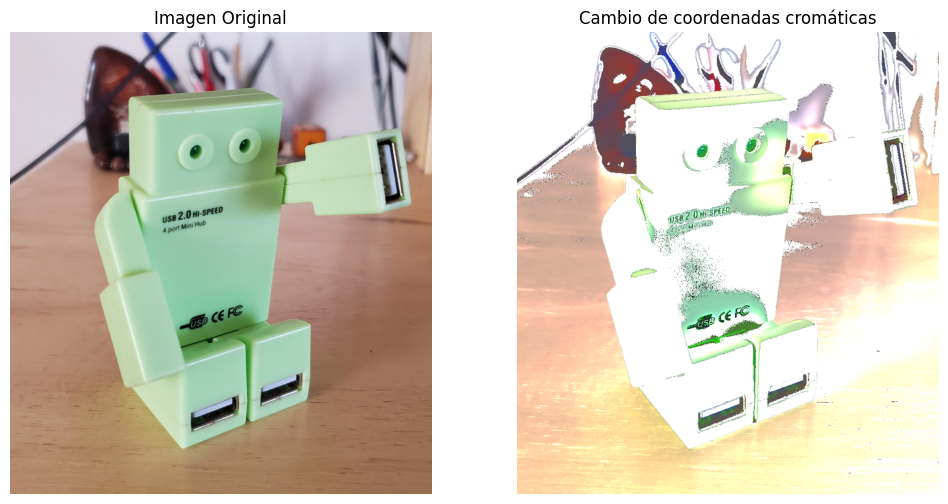

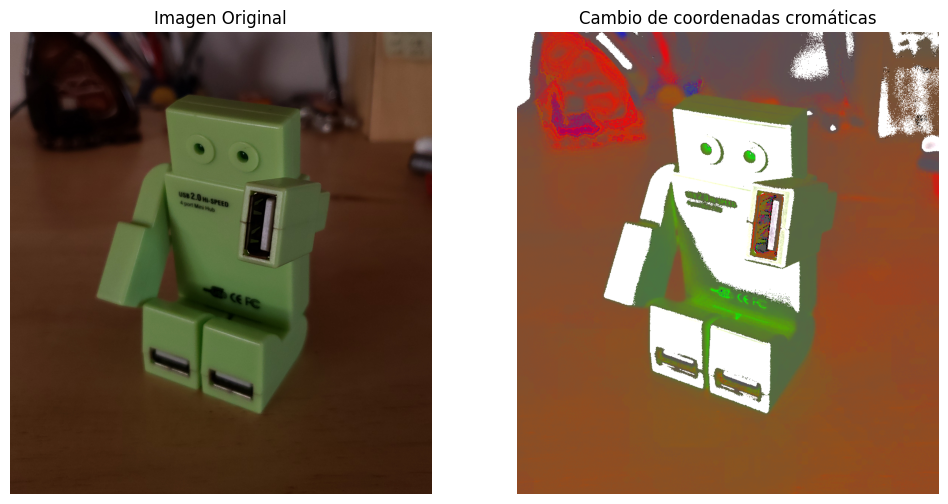

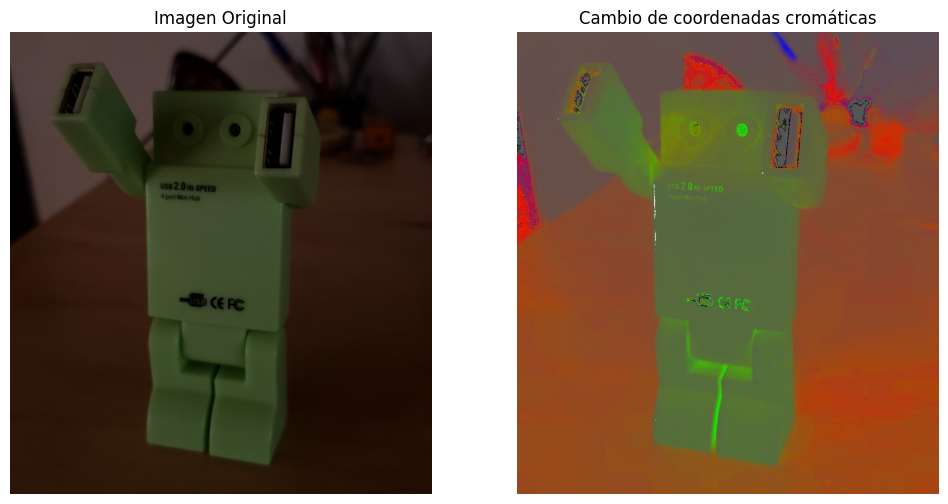

In [4]:
for i in range(1,4,1):
 chromeCoords(f'coord_cromaticas/CoordCrom_{i}.png')

# Algoritmo de white pathc

In [7]:
def whitePatch(image):
    img = cv.imread(f'white_patch/{image}')
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    im_r, im_g, im_b = cv.split(imgRGB)
    im_r_max = im_r.max()
    im_g_max = im_g.max()
    im_b_max = im_b.max()

    print('Los valores máximos RGB sin transformar son',im_r_max,im_g_max,im_b_max)
    
    R, G, B = (255 / im_r_max) * im_r ,  (255 / im_g_max) * im_g, (255 / im_b_max) * im_b

    R = np.clip(R, 0, 255).astype(np.uint8)
    G = np.clip(G, 0, 255).astype(np.uint8)
    B = np.clip(B, 0, 255).astype(np.uint8)

   

    imgRGB2 =  cv.merge((R,G,B))
   
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].imshow(imgRGB)
    axs[0].set_title('Imagen Original')
    axs[0].axis('off') 

    axs[1].imshow(imgRGB2)
    axs[1].set_title('Imagen Corregida (White Patch)')
    axs[1].axis('off') 
    
    plt.show()


wp_blue.jpg
Los valores máximos RGB sin transformar son 255 255 255


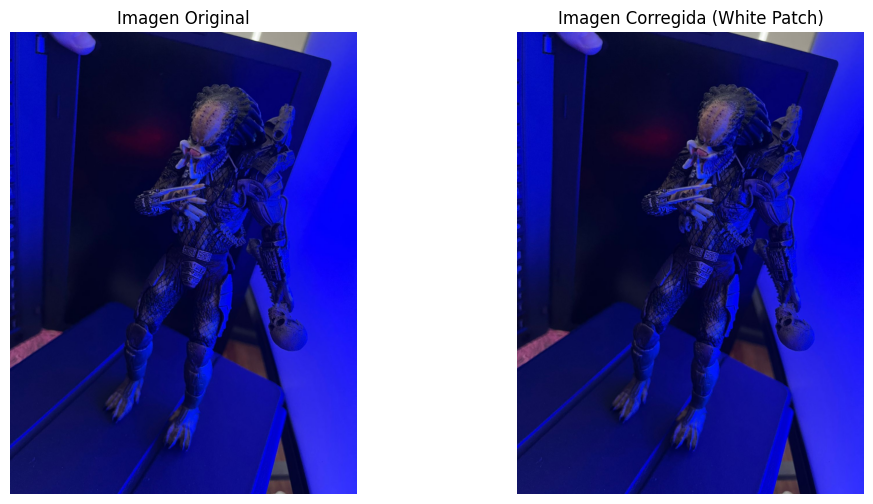

test_green.png
Los valores máximos RGB sin transformar son 210 250 171


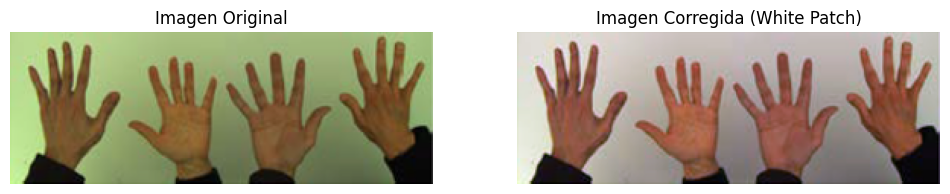

test_blue.png
Los valores máximos RGB sin transformar son 165 138 200


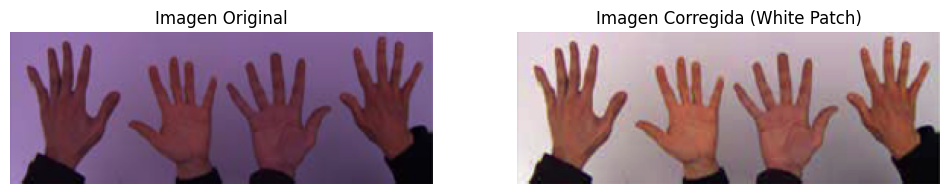

wp_green2.jpg
Los valores máximos RGB sin transformar son 170 255 172


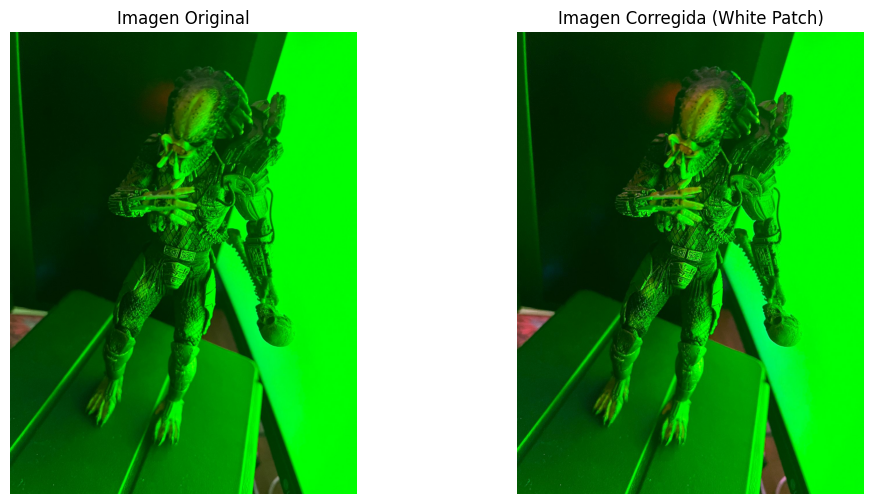

wp_red.png
Los valores máximos RGB sin transformar son 255 134 122


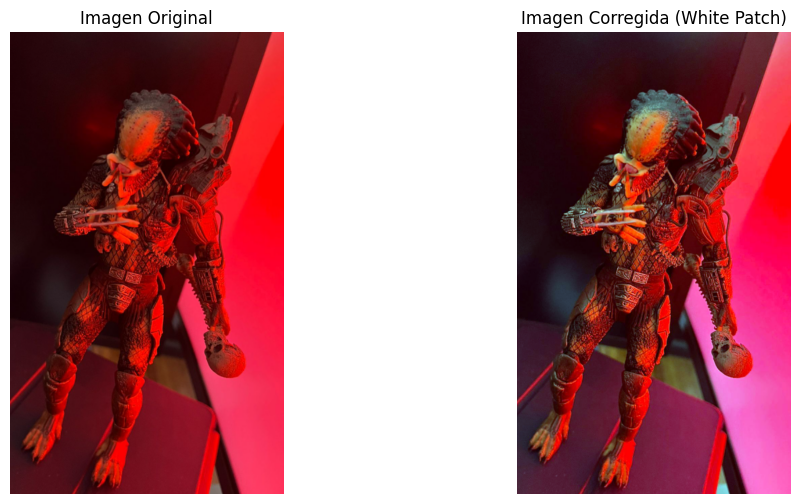

wp_red2.jpg
Los valores máximos RGB sin transformar son 255 201 203


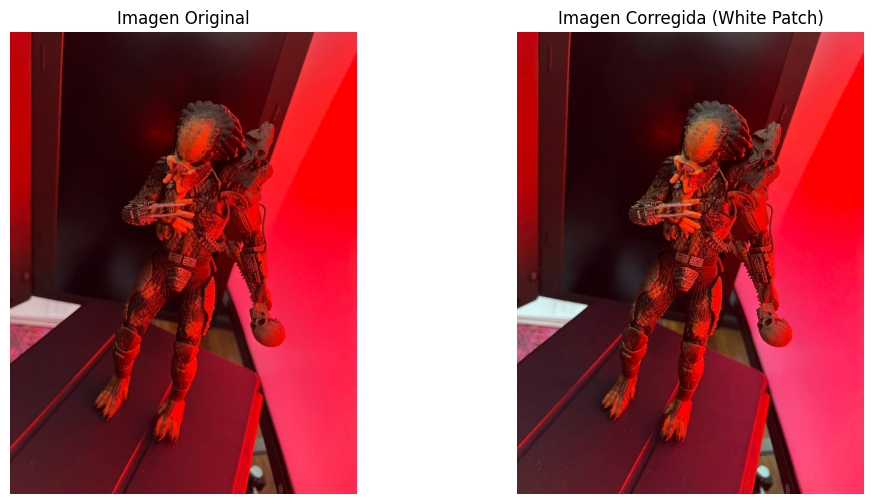

test_red.png
Los valores máximos RGB sin transformar son 247 157 175


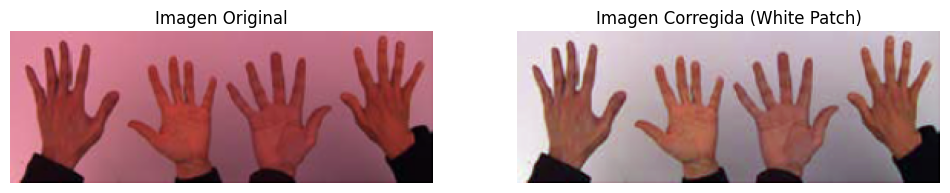

wp_green.png
Los valores máximos RGB sin transformar son 126 252 155


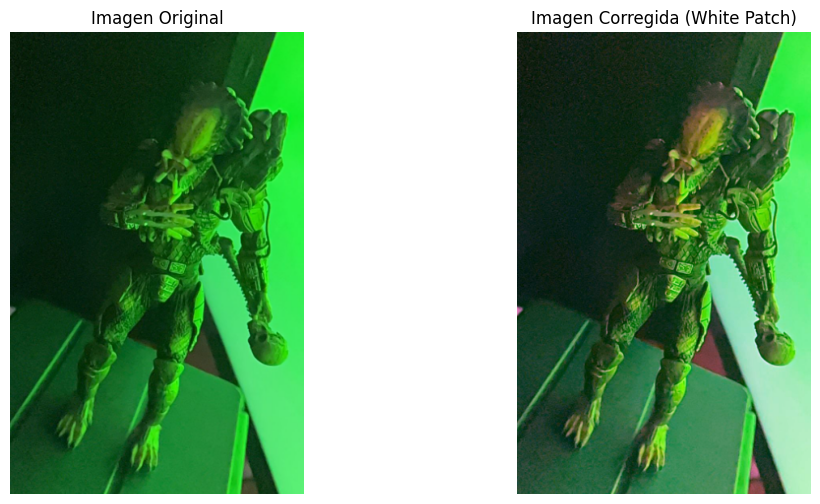

In [8]:
folder = 'white_patch'
files = os.listdir(folder)
for i in files:
    print(i)
    whitePatch(i)

* En la imagen **wp_blue** no hubo cambios, ya que el máximo de los tres canales es 255, que corresponde a la máxima intensidad de sus posibles valores. Por lo tanto, la división da 1 en los tres componentes.

* En las imágenes **wp_red y wp_red2** hay una diferencia en los máximos de saturación debido al blanco que aparece en la segunda en la esquina inferior izquierda. Recordemos que este algoritmo intenta normalizar la imagen al blanco (máxima saturación) de la imagen. La diferencia o contraste en un canal se hará mayor en la imagen transformada si tiene un máximo menor o más lejano a 255. Esto es lo que sucede en wp_red2, donde los azules y los verdes se ven reescalados respecto al rojo, que permaneció igual. Se observa la misma situación en las imágenes wp_green.

* En las imágenes **test_blue, test_red y test_green**, se nota que el algoritmo equilibra (normaliza) la proporción de RGB para el "blanco". En cada caso, aumenta el valor de la saturación de los píxeles con menor valor respecto al máximo del canal, pues la división es mayor a 1.

# Parte 2

### 3.1

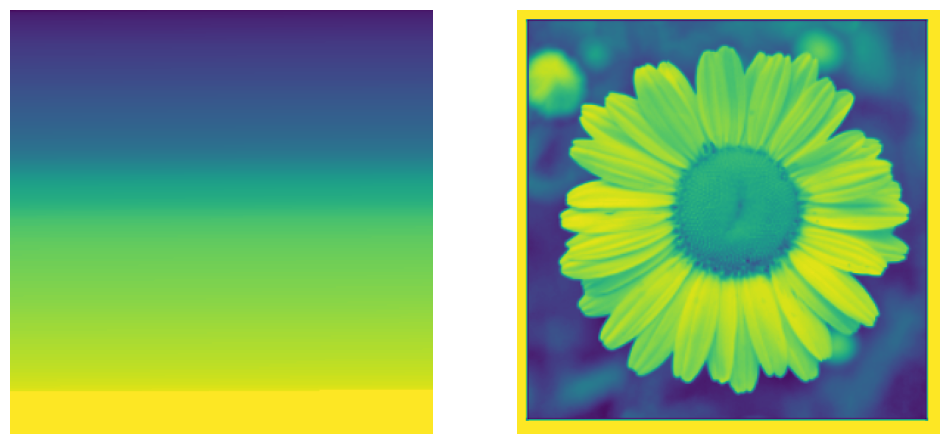

In [9]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img1)
axs[0].axis('off') 

axs[1].imshow(img2)
axs[1].axis('off') 

plt.show()

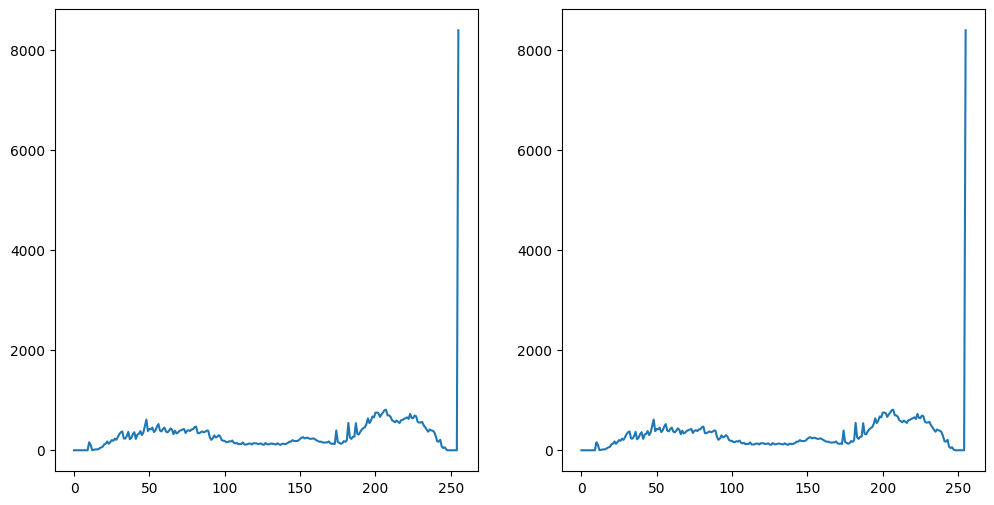

In [10]:
# numpy.histogram(a, bins=10, range=None, density=None, weights=None)
hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
hist2,bins2 = np.histogram(img2.ravel(),256,[0,256])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(hist1)
axs[1].plot(hist2)

plt.show()

* Ambas imágenes son irreconocibles para un algoritmo de clásificación a partir del histograma de los valores de saturación pues son iguales. El histograma no da cuenta de la distribución espacial de los píxeles solo de la cantidad de estos según su valor de intensidad.

### 3.3

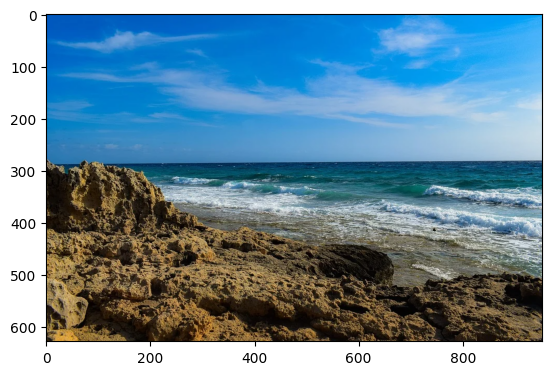

In [12]:
# llamo la imagen
img = cv.imread('segmentacion.png')
imgRGB1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(imgRGB1)
plt.show()

Voy a intentar segmentar el cielo con la media de los valores de intensidad de los píxeles. 

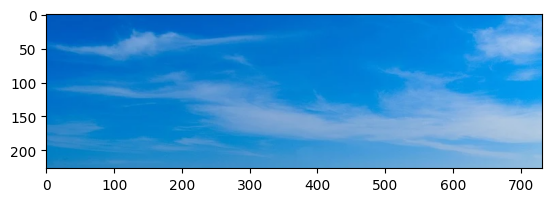

In [13]:
#img_sky = imgRGB1[0:267, 309:853,:]
img_sky = imgRGB1[7:234, 7:739,:]
plt.figure(2)
plt.imshow(img_sky)
plt.show()

In [14]:
color_mean, color_std = cv.meanStdDev(img_sky)

Aquí escogí un sigma de 4, el cual me permitió segmentar el cielo sin embargo también cumple dicha condición para algunos píxeles del mar.

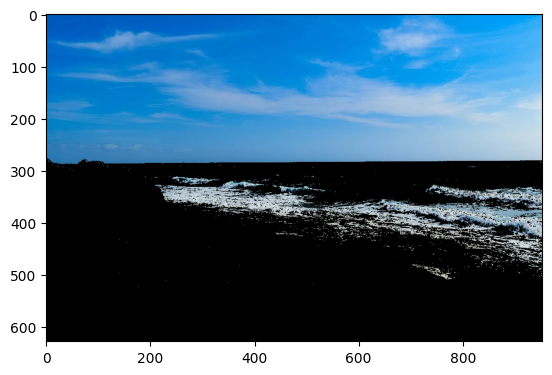

<function matplotlib.pyplot.show(close=None, block=None)>

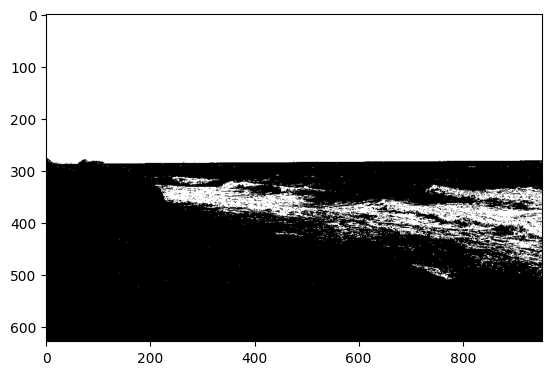

In [19]:
n_sigma = 4
mask = cv.inRange(imgRGB1, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(imgRGB1, imgRGB1, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

En la siguiente imagen en el espacio HSV, se puede observar que el mar guarda similaridades con el mar y con el cielo. Intente segmentar las rocas pero siempre tomaba gran parte del mar, lo que es claro en la transformación.

(0.0, 0.0, 0.0, 0.0)


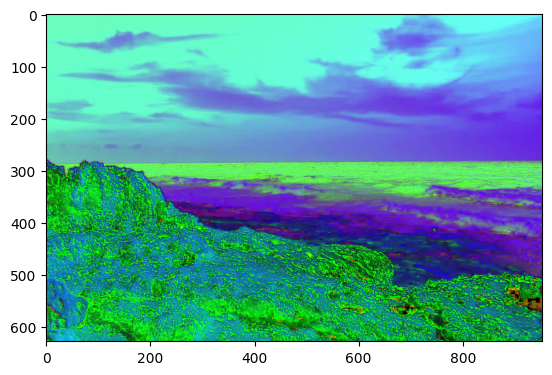

In [20]:
img_HSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)

#img_muestra = img_HSV[100:150,325:375,:]
img_muestra_hsv = img_HSV[755:714, 1:180,:]

# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean = cv.mean(img_muestra_hsv)
    
print(color_mean)